## Introduction

For comparing methods for stress and tangent computation we consider the compressible hyperelastic energy density function (Pence and Gou, 2009)

\begin{equation}
\Psi(C_{IJ}) =\frac{K}{8}\left(J - J^{-1}\right)^2 + \frac{G}{2}\left(I_1 \, J^{-2/3} - 3 \right),
\end{equation}

in which $K$ and $G$ denote the compression modulus and the shear modulus respectively.
It is formulated in terms of two invariants ($J$ and $I_1$) of the right Cauchy-Green deformation tensor $C_{IJ}$ which are defined as $J^2= \det{C_{IJ}}$ and $I_1=C_{II}$.

According to basic thermodynamic arguments the second Piola-Kirchhoff stress $S_{IJ}$ is computed from the energy density function as

\begin{equation}
 S_{IJ}  = 2 \frac{\partial \Psi}{\partial {C}_{IJ}}.
\end{equation}

Furthermore, the tangent operator, i.e., the derivative of $S_{IJ}$ with respect to the Green-Lagrange strain tensor $E_{KL}$, is computed as

\begin{equation}
 \mathbb{C}_{IJKL}  = 4 \frac{\partial^2 \Psi}{\partial {C}_{IJ}{C}_{KL}}.
\end{equation}

In the following we compare finite difference approximations, complex-step derivative approximations and automatic differentiation with hyper-dual numbers to the analytically derived solutions for the computation of stress and tangent operator.

## Preliminaries

In [1]:
import numpy as np

# set elastic constants
K = 3500
G = 1500

# define deformation gradient
F = np.eye(3)
F[0, 1] += 1e-2
F[1, 2] += 2e-2
F[0, 2] += 3e-2
F[0, 0] += 5e-2
F[1, 1] += 6e-2
F[2, 2] += 7e-2

print("F = \n", F)

# compute right Cauchy-Green deformation tensor
C = F.T @ F

print("C = \n", C)

F = 
 [[1.05 0.01 0.03]
 [0.   1.06 0.02]
 [0.   0.   1.07]]
C = 
 [[1.1025 0.0105 0.0315]
 [0.0105 1.1237 0.0215]
 [0.0315 0.0215 1.1462]]


In [2]:
# import all methods to compute stress and tangent operator
import src.fd as fd
import src.cd as cd
import src.csda as csda
import src.ad as ad
import src.efd as efd
import src.ecd as ecd

## Case 1

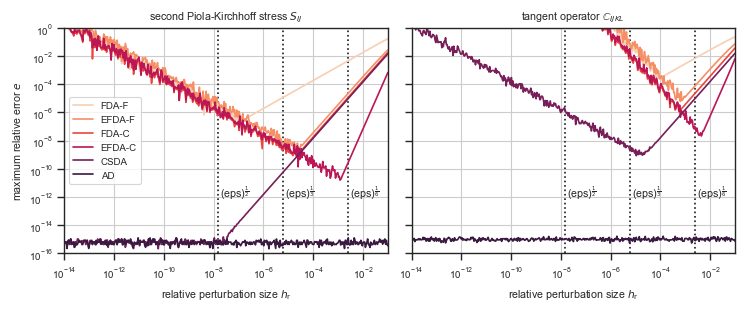

In [3]:
import case1

# define step sizes
stepsizes = np.logspace(-16, -1, 500)

# define methods for investigation
methods = {
    "FDA-F": fd,
    "EFDA-F": efd,
    "FDA-C": cd,
    "EFDA-C": ecd,
    "CSDA": csda,
    "AD": ad,
}

# run study
case1.runStepSizeStudy(C, K, G, methods, stepsizes)

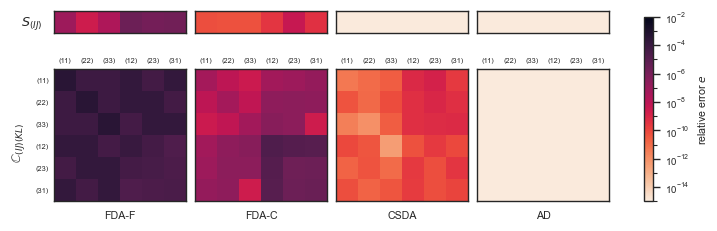

In [4]:
# define methods to investigate
methods = {
    "FDA-F": fd,
    "FDA-C": cd,
    "CSDA": csda,
    "AD": ad,
}

case1.computeComponentWiseErrors(C, K, G, methods)

## Case 2

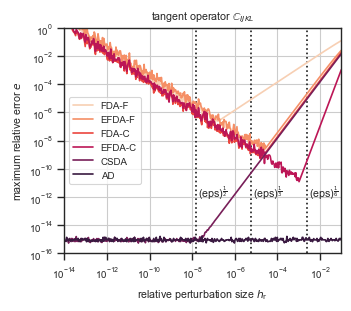

In [5]:
import case2

# define step sizes
stepsizes = np.logspace(-16, -1, 500)

# define methods for investigation
methods = {
    "FDA-F": fd,
    "EFDA-F": efd,
    "FDA-C": cd,
    "EFDA-C": ecd,
    "CSDA": csda,
    "AD": ad,
}

# run study
case2.runStepSizeStudy(C, K, G, methods, stepsizes)

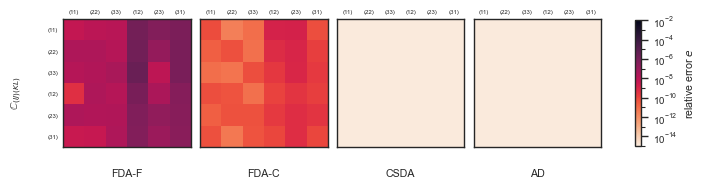

In [7]:
# define methods to investigate
methods = {
    "FDA-F": fd,
    "FDA-C": cd,
    "CSDA": csda,
    "AD": ad,
}

case2.computeComponentWiseErrors(C, K, G, methods)